In [2]:
!git clone https://github.com/yunusskeete/yolov7-object-tracking.git

/Users/yunusskeete/.zshenv:2: permission denied: /opt/homebrew/opt/openjdk@11
fatal: destination path 'yolov7-object-tracking' already exists and is not an empty directory.


In [3]:
%cd yolov7-object-tracking

/Users/yunusskeete/Documents/GitHub/VehicleCounting/yolov7-object-tracking


In [4]:
!pip install --upgrade pip

!pip install -r requirements.txt

/Users/yunusskeete/.zshenv:2: permission denied: /opt/homebrew/opt/openjdk@11
/Users/yunusskeete/.zshenv:2: permission denied: /opt/homebrew/opt/openjdk@11


In [5]:
# # for detection only
# python detect.py --weights yolov7.pt --source "your video.mp4"

#if you want to change source file
!python detect_and_track.py --weights yolov7.pt --source "motorway.mp4"

# #for specific class (person)
# python detect_and_track.py --weights yolov7.pt --source "your video.mp4" --classes 0

/Users/yunusskeete/.zshenv:2: permission denied: /opt/homebrew/opt/openjdk@11
Namespace(weights=['yolov7.pt'], download=True, source='motorway.mp4', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='object_tracking', exist_ok=False, no_trace=False)
YOLOR 🚀 yolov7-object-tracking-19-gc7aecc9 torch 1.12.1 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

video 1/1 (1/284) /Users/yunusskeete/Documents/GitHub/VehicleCounting/yolov7-object-tracking/motorway.mp4: /Users/yunusskeete/miniforge3/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the index

In [11]:
import requests
import json
import datetime
from IPython.display import display, Image, YouTubeVideo
from IPython.core.display import Video

In [12]:
app_key = '7bd4045d7ca14033ac6d7cb50fd0d8ae'
jamcam_url = "https://api.tfl.gov.uk/Place/Type/JamCam"
jamcam_response = requests.get(jamcam_url).json()
print('len(jamcam_response):', len(jamcam_response))
print()
print('jamcam_response[0].keys():', jamcam_response[0].keys())
jamcam_response[0]['id'], jamcam_response[0]['commonName'], jamcam_response[0]['additionalProperties'][-1]['modified']

len(jamcam_response): 910

jamcam_response[0].keys(): dict_keys(['$type', 'id', 'url', 'commonName', 'placeType', 'additionalProperties', 'children', 'childrenUrls', 'lat', 'lon'])


('JamCams_00001.04529',
 'A23 Streatham H Rd/Mnt Ephrian Rd',
 '2022-10-24T10:17:32.51Z')

In [13]:
# setup
i = 1
v = 2

# select camera
# cams = 8,9,11,12,13,14,15,16,17,
cam = 18

# get response
jamcam_response = requests.get(jamcam_url).json()

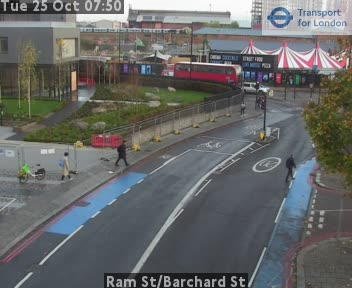

In [14]:
image_url = jamcam_response[cam]['additionalProperties'][i]['value']
Image(image_url)

In [15]:
## SAVE THE IMAGE
img_data = requests.get(image_url).content
with open('JamCam_image.jpg', 'wb') as handler:
    handler.write(img_data)

In [16]:
# video_url = image_url = jamcam_response[cam]['additionalProperties'][v]['value']
video_url = jamcam_response[cam]['additionalProperties'][v]['value']
Video(video_url)

In [17]:
## SAVE THE VIDEO
vid_data = requests.get(video_url).content
with open('JamCam_video.mp4', 'wb') as handler:
    handler.write(vid_data)

Removed printouts:
- [datasets.py](yolov7-object-tracking/utils/datasets.py) line 181
- [detect_and_track.py](yolov7-object-tracking/detect_and_track.py) line 236

In [18]:
#if you want to change source file
!python detect_and_track.py --weights yolov7.pt --source "JamCam_video.mp4"

/Users/yunusskeete/.zshenv:2: permission denied: /opt/homebrew/opt/openjdk@11
Namespace(weights=['yolov7.pt'], download=True, source='JamCam_video.mp4', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='object_tracking', exist_ok=False, no_trace=False)
YOLOR 🚀 yolov7-object-tracking-19-gc7aecc9 torch 1.12.1 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

video 1/1 (1/268) /Users/yunusskeete/Documents/GitHub/VehicleCounting/yolov7-object-tracking/JamCam_video.mp4: /Users/yunusskeete/miniforge3/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass t

In [21]:
import cv2

# Jamcam videos:

- Dimensions: `352x288`
- Duration: `00:11`
- Size: ~`115 KB` on disk
- FPS: `25`

In [28]:
duration_s = 11
size_kb = 115
fps = 25
print(f"Video duration: {duration_s} (s)")

# ME
sample_rate = 10/25
print(f"Frame sample rate: {sample_rate}")

frames_per_video = duration_s * fps
inference_frames_per_video = frames_per_video * sample_rate
print(f"Inference frames per video: {inference_frames_per_video} (of {frames_per_video} total)")

inference_time_per_frame_ms = 450
NMS_time_per_frame_ms = 0.5
total_time_per_frame_ms = inference_time_per_frame_ms + NMS_time_per_frame_ms

total_time_s = inference_frames_per_video * (total_time_per_frame_ms/1000)
print(f"Total processing time: {total_time_s}")

Video duration: 11 (s)
Frame sample rate: 0.4
Inference frames per video: 110.0 (of 275 total)
Total processing time: 49.555


In [30]:
272/8

34.0

In [54]:
"""
Sampling every 1 frames,
sort_max_age = 5
sort_min_hits = 2
sort_iou_thresh = 0.2
dir: yolov7-object-tracking/runs/detect/object_tracking
""" 
!python detect_and_track.py --weights yolov7.pt --source "JamCam_video-2.mp4" --save-txt

/Users/yunusskeete/.zshenv:2: permission denied: /opt/homebrew/opt/openjdk@11
Namespace(weights=['yolov7.pt'], download=True, source='JamCam_video-2.mp4', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='object_tracking', exist_ok=False, no_trace=False)
save_txt: True
YOLOR 🚀 yolov7-object-tracking-19-gc7aecc9 torch 1.12.1 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

images: []
videos: ['/Users/yunusskeete/Documents/GitHub/VehicleCounting/yolov7-object-tracking/JamCam_video-2.mp4']
image size: 640
stride: 32
video_flag: [True]
video 1/1 (1/272) /Users/yunusskeete/Documents/GitHub/VehicleCounting/yolov7-object-tracking/JamC